<a href="https://colab.research.google.com/github/Shashwenth/Mini-Project/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION:
Welcome to my minor project for the Data science internship at Smartknower.
I will be using the "4 Monkeys Family classification" dataset. The original source of the dataset ifs from Kaggle you guys can also access it from [here](https://www.kaggle.com/slothkong/10-monkey-species).

# Import Required Packages:
Initially we will be importing packages like os,skimage for loading our datasets and resizing to our required size.Then we need pandas and numpy for creating dataframe and playing with it.
Finally we use SVM for training our model. So without furthur adieu lets gets started.

In [4]:
import glob, os
import re
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
from matplotlib import pyplot as plt
from skimage import data, color
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [9]:
datadir="/content/drive/MyDrive/mini/training/training/"
ca=["n0","n1","n2","n3"]
target=[]
flat_data=[]
for i in ca:
    path=os.path.join(datadir,i)
    print(path)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img),plugin='matplotlib')
        img_resize=resize(img_array,(100,100))
        flat_data.append(img_resize)
        if(i=="n0"):
            target.append(0)
        elif(i=="n1"):
            target.append(1)
        elif(i=="n2"):
            target.append(2)
        else:
            target.append(3)

# Data frame creation:
Now that we have imported our data lets have a look at some of them now.Then lets convert these images into arrays for training our model.Once the data frame is created lets normalize the data by dividing by 100(We divide by 100.0 because we resized our image by 100X100.).

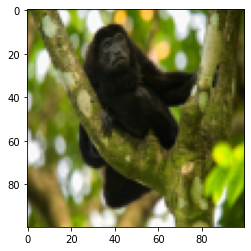

In [24]:
plt.imshow(flat_data[0])

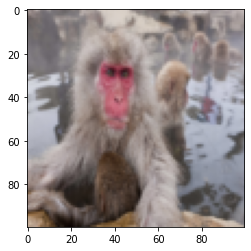

In [10]:
plt.imshow(flat_data[-1])

In [11]:
df=np.asarray(flat_data)

In [12]:
np.unique(target)

array([0, 1, 2, 3])

In [13]:
df=df/100.0

In [14]:
df.shape

(448, 100, 100, 3)

# Training Our Model:
Well now that our data in array format is ready , we might need to reshape into a 2D array .In the above code we could see that the shape of the data frame is not in our desired format . So we reshape it into a 2D array.
Now that our final data is ready , lets train it .

 We will be using **LinearSVM()** because it is faster and performs better than many models comparatively.


In [15]:
nsamples, nx, ny , a = df.shape
df = df.reshape((nsamples,nx*ny*a))

In [16]:
df.shape

(448, 30000)

In [17]:
clf=LinearSVC()
clf.fit(df,target)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

# Testing Our Model:
Finally , we will import the data to be tested and perform all the transformation we did for the training data set here also. Then we will test it with our model.

In [18]:
datadir1="/content/drive/MyDrive/mini/validation/validation"
ca=["n0","n1","n2","n3"]
target1=[]
flat_data1=[]
for i in ca:
    path=os.path.join(datadir1,i)
    print(path)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img),plugin='matplotlib')
        img_resize=resize(img_array,(100,100))
        flat_data1.append(img_resize)
        if(i=="n0"):
            target1.append(0)
        elif(i=="n1"):
            target1.append(1)
        elif(i=="n2"):
            target1.append(2)
        else:
            target1.append(3)

In [19]:
df1=np.asarray(flat_data1)
df1=df1/100.0
df1.shape

(111, 100, 100, 3)

In [20]:
nsamples, nx, ny , a = df1.shape
df1 = df1.reshape((nsamples,nx*ny*a))

In [21]:
pr=clf.predict(df1)

In [22]:
accuracy_score(target1,pr)

0.7477477477477478

Predicted Answer : Bald Uakari
Correct Answer: Bald Uakari


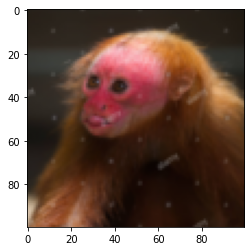

In [27]:
predicted=clf.predict(df1[[64]])
if(predicted==0):
    print("Predicted Answer : Mantled Howler")
if(predicted==1):
    print("Predicted Answer : Patas Monkey")
if(predicted==2):
    print("Predicted Answer : Bald Uakari")
if(predicted==3):
    print("Predicted Answer : Japanese Macaque")
plt.imshow(flat_data1[64])
targetclf=["Mantled Howler","Patas Monkey","Bald Uakari","Japanese Macaque"]
print("Correct Answer: "+targetclf[target1[64]])

# Result:
Hurray , we got an accuracy of nearly 75% which I think is pretty good for the small amount of data we have given . 

### Thank You.


